In [1]:
# pip install scikeras

In [2]:
# pip install tensorflow

In [3]:
# Creating MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Loading Dataset
data = pd.read_csv('forestfires.csv')
data.sample(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
486,aug,tue,95.1,141.3,605.8,17.7,24.1,43,6.3,0.0,...,0,0,0,0,0,0,0,0,0,small
385,aug,sun,91.6,181.3,613.0,7.6,20.9,50,2.2,0.0,...,0,0,0,0,0,0,0,0,0,large
13,sep,mon,90.9,126.5,686.5,7.0,21.3,42,2.2,0.0,...,0,0,0,0,0,0,0,0,1,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small


### EDA & Data preprocessing

In [5]:
data.shape

(517, 31)

In [6]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

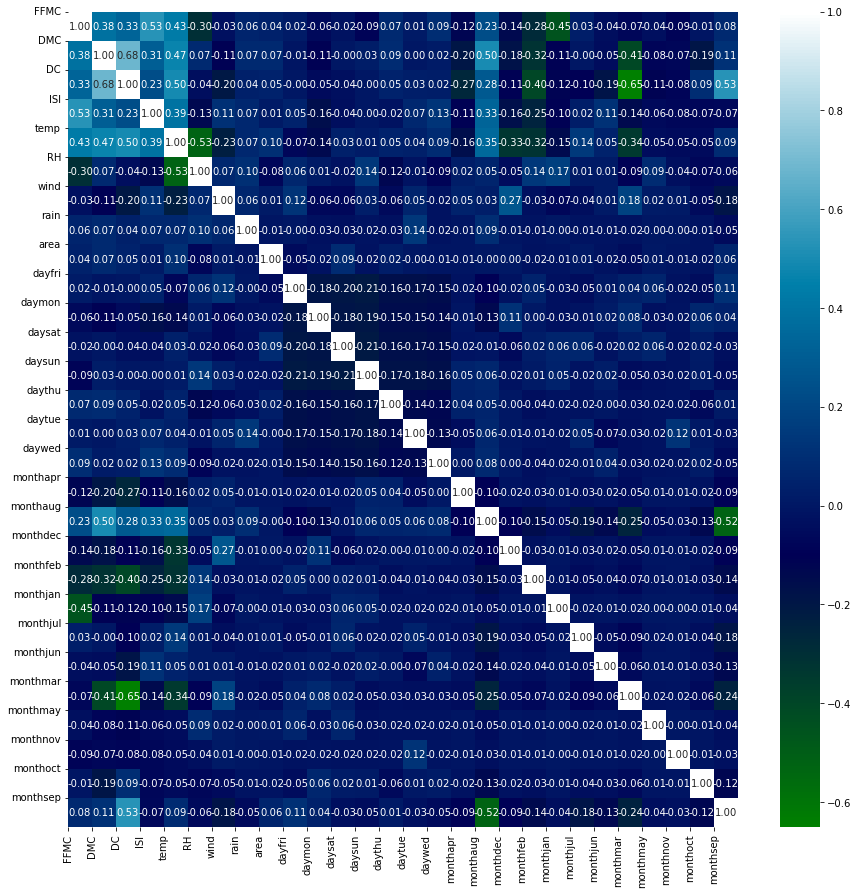

In [9]:
# Heatmap of correlation matrix
corr = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='ocean', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [10]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### Since number of columns are more, let's do PCA

In [11]:
pca_data = data.iloc[:,2:30]
pca_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(pca_data)
norm_data = sc.transform(pca_data)
norm_data

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=28)
pca_values = pca.fit_transform(norm_data)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02,  1.30619034e-14, -1.63267504e-16],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02,  4.68082711e-15, -4.51925684e-16],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02,  4.39226511e-15, -2.00039593e-16],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01,  3.29069057e-17,  3.06608857e-16],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02,  5.35070622e-16,  1.08857027e-16],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02,  1.24763181e-16,  7.68823392e-17]])

In [14]:
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

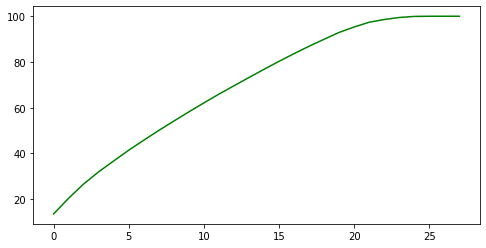

In [15]:
plt.figure(figsize=(8,4))
plt.plot(var1,color="green");

In [16]:
final_data = pd.concat([pd.DataFrame(pca_values[:,0:24],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                                                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                                                             'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
                                                             'pc22','pc23','pc24']),
                     data[['size_category']]], axis = 1)
final_data['size_category'].replace(('large','small'),(1,0),inplace=True)
final_data.sample(10)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,size_category
359,-1.053998,1.809617,-0.756787,-1.305646,-1.413673,0.566760,-0.385137,0.419021,-0.380013,0.160688,...,-0.263525,-0.381086,0.629491,0.027969,0.599932,-0.350394,0.739994,-0.147985,0.063090,1
162,2.567961,-2.201081,-1.777431,0.127155,-0.695312,1.066338,1.121923,-1.226187,1.346545,-0.108557,...,-0.134345,-0.300213,-1.182348,0.266520,-0.143781,0.303859,-1.338518,0.385951,0.136737,0
248,-2.476539,-1.380935,-0.316286,0.918279,0.098008,-0.958730,-0.776492,-0.309505,-1.606876,1.598044,...,0.739785,0.397483,0.256879,0.136697,0.690924,-0.238814,-0.025721,-0.210254,0.285878,0
200,-0.896576,1.466090,-0.606266,-0.069265,1.279184,1.501000,-0.550756,1.344182,0.031085,0.179013,...,0.036047,0.530035,-0.370840,-1.568303,-0.020455,-0.752727,0.227388,0.323373,0.151126,1
351,-0.019606,1.215371,-0.156827,-2.562811,-1.361792,0.643245,-0.124297,0.028748,0.193221,0.489354,...,-0.366265,-0.495091,0.324999,0.194721,-0.249163,0.345186,-0.436575,-0.066804,-0.475170,1
113,-0.214431,1.988090,-1.275143,-0.301499,0.874573,-0.639374,-0.500675,-0.598221,-0.401057,-1.026539,...,0.663884,-0.268652,0.248974,-0.341686,0.509023,0.905490,0.069237,-0.322938,-0.239503,0
494,-2.468595,-1.426903,-0.204595,1.239900,-0.434557,0.737754,0.803155,-1.344802,0.396806,0.184090,...,-0.136954,-1.033180,-0.565236,-0.360146,0.935207,0.523327,-0.437084,0.050091,-0.041311,1
479,0.507860,0.262969,-0.713962,1.336900,0.999189,0.757581,0.226185,-1.338811,1.817443,-0.690131,...,0.389691,0.384368,3.809801,1.213437,-1.309294,0.211010,-0.633838,-0.298750,-0.381387,1
308,-0.528386,1.722946,0.395893,-0.017790,-0.416869,-0.872620,-0.896256,0.794283,1.255190,-0.545232,...,0.412978,0.637809,-0.753356,0.140578,0.103852,0.164230,1.114821,-0.071621,-0.039343,0
281,3.676838,-0.963429,-0.290952,-3.320026,4.609714,0.087546,1.648906,-1.017746,2.145042,3.407968,...,-1.156300,0.604779,-1.318953,-1.611282,1.680390,-1.275151,1.553225,0.502859,0.194520,1


In [17]:
array = final_data.values
X = array[:,0:24]
y = array[:,24]

X.reshape(-1,1)
y.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

### Create ANN Model

In [18]:
model = Sequential()
model.add(Dense(36,input_dim = 24,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
# Compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [20]:
# Fit the model
model.fit(X,y,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 5ms/step - loss: 0.6593 - accuracy: 0.6416 - val_loss: 0.7002 - val_accuracy: 0.6667
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.7630 - val_loss: 0.7072 - val_accuracy: 0.6667
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.7717 - val_loss: 0.7104 - val_accuracy: 0.6725
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7775 - val_loss: 0.7201 - val_accuracy: 0.6725
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7803 - val_loss: 0.7268 - val_accuracy: 0.6725
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7803 - val_loss: 0.7224 - val_accuracy: 0.6725
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.7803 - val_loss: 0.7221 - val_accuracy: 0.6784
Epoch 8/100
3

In [21]:
# evaluate the model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 995us/step - loss: 0.4502 - accuracy: 0.9497
accuracy: 94.97%


#### Artificial Neural Network Model -  Hyperparameters Tuning(Batch Size, Epochs,learning_rate,dropout_rate,activation_function,init and No of Neurons)

In [22]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
# from keras.models import Sequential
# from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.optimizers import adam_v2
from sklearn.metrics import mean_squared_error
# from scikeras.wrappers import KerasClassifier, KerasRegressor

In [29]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 24,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam=adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
    return model



In [30]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [20,40]
epochs = [50,100]
learning_rate = [0.01,0.1]
dropout_rate = [0.1,0.2]
activation_function = ['relu','linear']
init = ['uniform','normal']
neuron1 = [24,36]
neuron2 = [24,36]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)



C:\Users\HP\AppData\Local\Temp/ipykernel_5240/2661178702.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


In [31]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10, scoring='neg_mean_squared_error',error_score='raise')
grid_result = grid.fit(X, y)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=24, neuron2=24
4/4 [==============================] - 0s 1ms/step
[CV 1/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=24, neuron2=24;, score=-0.019 total time=   1.4s
[CV 2/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=24, neuron2=24
4/4 [==============================] - 0s 2ms/step
[CV 2/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=24, neuron2=24;, score=-0.173 total time=   1.4s
[CV 3/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=24, neuron2=24
4/4 [====================

In [33]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : -0.12203136669156085, using {'activation_function': 'relu', 'batch_size': 40, 'dropout_rate': 0.1, 'epochs': 100, 'init': 'normal', 'learning_rate': 0.01, 'neuron1': 24, 'neuron2': 24}


In [ ]:
Best : -0.12203136669156085, using {'activation_function': 'relu', 'batch_size': 40, 'dropout_rate': 0.1, 'epochs': 100, 'init': 'normal', 'learning_rate': 0.01, 'neuron1': 24, 'neuron2': 24}